In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from RL_library import *

from ChessEnvironment.degree_freedom_queen import *
from ChessEnvironment.degree_freedom_king1 import *
from ChessEnvironment.degree_freedom_king2 import *
from ChessEnvironment.generate_game import *
from ChessEnvironment.Chess_env import *

## SARSA

In [44]:
env=Chess_Env(4)
data = np.load("Data/S_FinalModel.pkl", allow_pickle=True)

W1 = data['W1']
b1 = data['b1']
W2 = data['W2']
b2 = data['b2']

print('Agent Performance Check, START')
R_perf, N_moves_perf = PerformanceCheck(env,W1,W2,b1,b2,100)
print('Agent Performance Check, Average reward:',R_perf,'Number of steps: ',N_moves_perf)
print('-------------------------------------------------------------------')

Agent Performance Check, START


100%|██████████| 100/100 [00:25<00:00,  3.94it/s]

Agent Performance Check, Average reward: 0.68 Number of steps:  143.54
-------------------------------------------------------------------


In [49]:
Episode = np.loadtxt("Data/S_Episode")
R_save = np.loadtxt("Data/S_R_save")
N_moves_save = np.loadtxt("Data/S_N_moves_save")

Text(0.5, 0, 'Set n : from ep{50(n-1)+1} to ep{50n}')

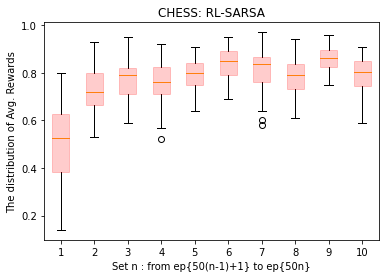

In [34]:
R_save_box = np.reshape(R_save, (-1, 50))

bplot = plt.boxplot(np.transpose(R_save_box),patch_artist=True,
            boxprops=dict(facecolor='r', color='r', alpha = 0.2));
plt.title('CHESS: RL-SARSA')
plt.ylabel('The distribution of Avg. Rewards')
plt.xlabel('Set n : from ep{50(n-1)+1} to ep{50n}')

Text(0.5, 0, 'Set n : from ep{50(n-1)+1} to ep{50n}')

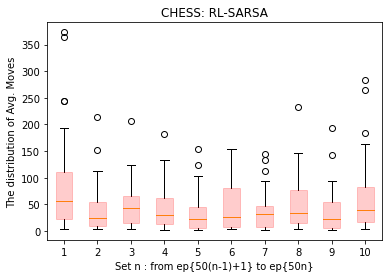

In [35]:
R_save_box = np.reshape(N_moves_save, (-1, 50))

plt.boxplot(np.transpose(R_save_box),patch_artist=True,
            boxprops=dict(facecolor='r', color='r',alpha = 0.2));
plt.title('CHESS: RL-SARSA')
plt.ylabel('The distribution of Avg. Moves')
plt.xlabel('Set n : from ep{50(n-1)+1} to ep{50n}')

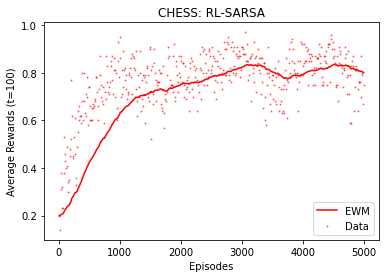

In [50]:
Data = R_save
xlabel = "Episodes"
ylabel = "Average Rewards (t=100)"
title = "CHESS: RL-SARSA"
color = 'r'

data, ema = EWM(Data,Episode,xlabel,ylabel,title,color,plot=True)

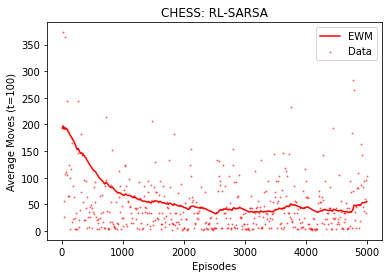

In [51]:
Data = N_moves_save
xlabel = "Episodes"
ylabel = "Average Moves (t=100)"
color = 'r'

data, ema = EWM(Data,Episode,xlabel,ylabel,title,color,plot=True)

## Q-Learning

In [15]:
env=Chess_Env(4)
data = np.load("Data/Q_FinalModel.pkl", allow_pickle=True)

W1 = data['W1']
b1 = data['b1']
W2 = data['W2']
b2 = data['b2']

print('Agent Performance Check, START')
R_perf, N_moves_perf = PerformanceCheck(env,W1,W2,b1,b2,100)
print('Agent Performance Check, Average reward:',R_perf,'Number of steps: ',N_moves_perf)
print('-------------------------------------------------------------------')

Agent Performance Check, START


100%|██████████| 100/100 [00:08<00:00, 12.23it/s]

Agent Performance Check, Average reward: 0.7 Number of steps:  74.7
-------------------------------------------------------------------


In [67]:
Episode = np.loadtxt("Data/Q_Episode")
R_save = np.loadtxt("Data/Q_R_save")
N_moves_save = np.loadtxt("Data/Q_N_moves_save")

Text(0.5, 0, 'Set n : from ep{50(n-1)+1} to ep{50n}')

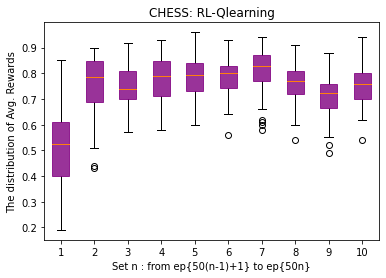

In [68]:
R_save_box = np.reshape(R_save, (-1, 50))

plt.boxplot(np.transpose(R_save_box),patch_artist=True,
            boxprops=dict(facecolor='purple', color='purple', alpha=0.8));
plt.title('CHESS: RL-Qlearning')
plt.ylabel('The distribution of Avg. Rewards')
plt.xlabel('Set n : from ep{50(n-1)+1} to ep{50n}')

Text(0.5, 0, 'Set n : from ep{50(n-1)+1} to ep{50n}')

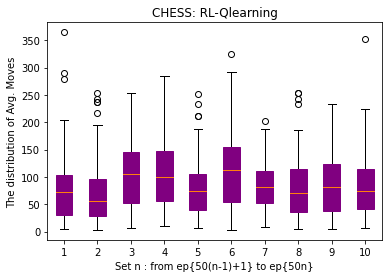

In [69]:
R_save_box = np.reshape(N_moves_save, (-1, 50))

plt.boxplot(np.transpose(R_save_box),patch_artist=True,
            boxprops=dict(facecolor='purple', color='purple'));
plt.title('CHESS: RL-Qlearning')
plt.ylabel('The distribution of Avg. Moves')
plt.xlabel('Set n : from ep{50(n-1)+1} to ep{50n}')

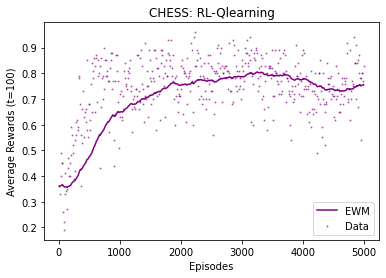

In [56]:
Data = R_save
xlabel = "Episodes"
ylabel = "Average Rewards (t=100)"
title = "CHESS: RL-Qlearning"
color = 'purple'

data, ema = EWM(Data,Episode,xlabel,ylabel,title,color,plot=True)

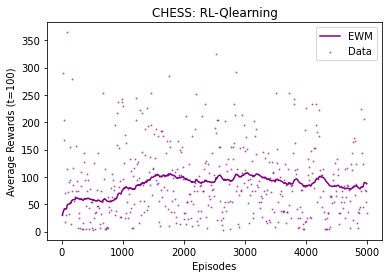

In [54]:
Data = N_moves_save
xlabel = "Episodes"
ylabel = "Average Rewards (t=100)"
title = "CHESS: RL-Qlearning"
color = 'purple'

data, ema = EWM(Data,Episode,xlabel,ylabel,title,color,plot=True)

## Sarsa vs Qlearning

In [45]:
Episode = np.loadtxt("Data/S_Episode")

S_R_save = np.loadtxt("Data/S_R_save")
S_N_moves_save = np.loadtxt("Data/S_N_moves_save")

Q_R_save = np.loadtxt("Data/Q_R_save")
Q_N_moves_save = np.loadtxt("Data/Q_N_moves_save")

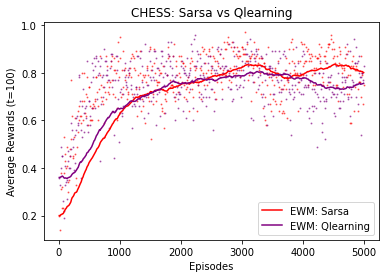

In [46]:
xlabel = "Episodes"
ylabel = "Average Rewards (t=100)"
title = "CHESS: Sarsa vs Qlearning"

Data = S_R_save
data_S, ema_S = EWM(Data,Episode,xlabel,ylabel,title)
Data = Q_R_save
data_Q, ema_Q = EWM(Data,Episode,xlabel,ylabel,title)

plt.scatter(Episode,list(data_S[0]), s=1, color='r', alpha=0.5)
plt.scatter(Episode,list(data_Q[0]), s=1, color='purple', alpha=0.5)

plt.plot(Episode,list(ema_S[0]), label="EWM: Sarsa", color = 'r')
plt.plot(Episode,list(ema_Q[0]), label="EWM: Qlearning", color = 'purple')

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()
plt.show()

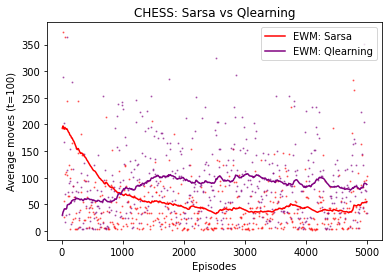

In [47]:
xlabel = "Episodes"
ylabel = "Average moves (t=100)"
title = "CHESS: Sarsa vs Qlearning"

Data = S_N_moves_save
data_S, ema_S = EWM(Data,Episode,xlabel,ylabel,title)
Data = Q_N_moves_save
data_Q, ema_Q = EWM(Data,Episode,xlabel,ylabel,title)

plt.scatter(Episode,list(data_S[0]), s=1, color='r', alpha=0.5)
plt.scatter(Episode,list(data_Q[0]), s=1, color='purple', alpha=0.5)

plt.plot(Episode,list(ema_S[0]), label="EWM: Sarsa", color = 'r')
plt.plot(Episode,list(ema_Q[0]), label="EWM: Qlearning", color = 'purple')

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()
plt.show()

## Parameter Beta

Text(0.5, 1.0, 'Epsilon-Decaying Method (different beta)')

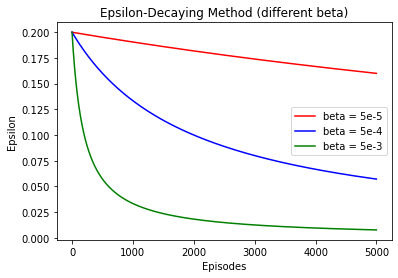

In [24]:
T = 5000

epsilon_0 = 0.2
beta = 0.00005
beta2 = 0.0005
beta3 = 0.005

epsilon_f = np.zeros(T)
epsilon_f2 = np.zeros(T)
epsilon_f3 = np.zeros(T)


for n in range(T):
    epsilon_f[n] = epsilon_0 / (1 + beta * n)
for n in range(T):
    epsilon_f2[n] = epsilon_0 / (1 + beta2 * n)
for n in range(T):
    epsilon_f3[n] = epsilon_0 / (1 + beta3 * n)

xlabel = "Episodes"
ylabel = "Epsilon"
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(epsilon_f, color = 'r', label = "beta = 5e-5")
plt.plot(epsilon_f2, color = 'b', label = "beta = 5e-4")
plt.plot(epsilon_f3, color = 'g', label = "beta = 5e-3")
plt.legend()
plt.title("Epsilon-Decaying Method (different beta)")

In [59]:
Episode = np.loadtxt("Data/Q_Episode")

R_save_00005 = np.loadtxt("Data/S_R_save")
N_moves_save_00005 = np.loadtxt("Data/S_N_moves_save")

R_save_0005 = np.loadtxt("Data/Data_b0005/S_R_save")
N_moves_save_0005 = np.loadtxt("Data/Data_b0005/S_N_moves_save")

R_save_005 = np.loadtxt("Data/Data_b005/S_R_save")
N_moves_save_005 = np.loadtxt("Data/Data_b005/S_N_moves_save")

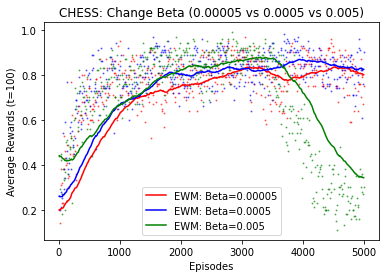

In [60]:
xlabel = "Episodes"
ylabel = "Average Rewards (t=100)"
title = "CHESS: Change Beta (0.00005 vs 0.0005 vs 0.005)"

Data = R_save_00005
data_00005, ema_00005 = EWM(Data,Episode,xlabel,ylabel,title)
Data = R_save_0005
data_0005, ema_0005 = EWM(Data,Episode,xlabel,ylabel,title)
Data = R_save_005
data_005, ema_005 = EWM(Data,Episode,xlabel,ylabel,title)

plt.scatter(Episode,list(data_00005[0]), s=1, color='r', alpha=0.5)
plt.scatter(Episode,list(data_0005[0]), s=1, color='b', alpha=0.5)
plt.scatter(Episode,list(data_005[0]), s=1, color='g', alpha=0.5)

plt.plot(Episode,list(ema_00005[0]), label="EWM: Beta=0.00005", color = 'r')
plt.plot(Episode,list(ema_0005[0]), label="EWM: Beta=0.0005", color = 'b')
plt.plot(Episode,list(ema_005[0]), label="EWM: Beta=0.005", color = 'g')

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()
plt.show()

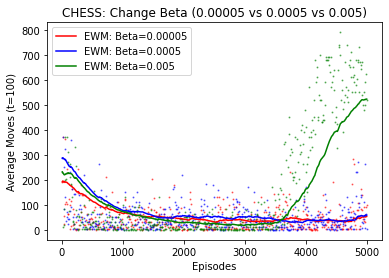

In [61]:
xlabel = "Episodes"
ylabel = "Average Moves (t=100)"
title = "CHESS: Change Beta (0.00005 vs 0.0005 vs 0.005)"

Data = N_moves_save_00005
data_00005, ema_00005 = EWM(Data,Episode,xlabel,ylabel,title)
Data = N_moves_save_0005
data_0005, ema_0005 = EWM(Data,Episode,xlabel,ylabel,title)
Data = N_moves_save_005
data_005, ema_005 = EWM(Data,Episode,xlabel,ylabel,title)

plt.scatter(Episode,list(data_00005[0]), s=1, color='r', alpha=0.5)
plt.scatter(Episode,list(data_0005[0]), s=1, color='b', alpha=0.5)
plt.scatter(Episode,list(data_005[0]), s=1, color='g', alpha=0.5)

plt.plot(Episode,list(ema_00005[0]), label="EWM: Beta=0.00005", color = 'r')
plt.plot(Episode,list(ema_0005[0]), label="EWM: Beta=0.0005", color = 'b')
plt.plot(Episode,list(ema_005[0]), label="EWM: Beta=0.005", color = 'g')

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()
plt.show()

## Parameter Gamma

In [62]:
## Parameter Beta
Episode = np.loadtxt("Data/Q_Episode")

R_save_85 = np.loadtxt("Data/S_R_save")
N_moves_save_85 = np.loadtxt("Data/S_N_moves_save")

R_save_55 = np.loadtxt("Data/Data_g55/S_R_save")
N_moves_save_55 = np.loadtxt("Data/Data_g55/S_N_moves_save")

R_save_25 = np.loadtxt("Data/Data_g25/S_R_save")
N_moves_save_25 = np.loadtxt("Data/Data_g25/S_N_moves_save")

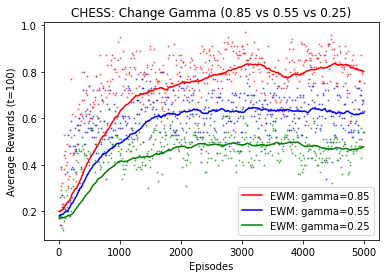

In [63]:
xlabel = "Episodes"
ylabel = "Average Rewards (t=100)"
title = "CHESS: Change Gamma (0.85 vs 0.55 vs 0.25)"

Data = R_save_85
data_85, ema_85 = EWM(Data,Episode,xlabel,ylabel,title)
Data = R_save_55
data_55, ema_55 = EWM(Data,Episode,xlabel,ylabel,title)
Data = R_save_25
data_25, ema_25 = EWM(Data,Episode,xlabel,ylabel,title)

plt.scatter(Episode,list(data_85[0]), s=1, color='r', alpha=0.5)
plt.scatter(Episode,list(data_55[0]), s=1, color='b', alpha=0.5)
plt.scatter(Episode,list(data_25[0]), s=1, color='g', alpha=0.5)

plt.plot(Episode,list(ema_85[0]), label="EWM: gamma=0.85", color = 'r')
plt.plot(Episode,list(ema_55[0]), label="EWM: gamma=0.55", color = 'b')
plt.plot(Episode,list(ema_25[0]), label="EWM: gamma=0.25", color = 'g')

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()
plt.show()

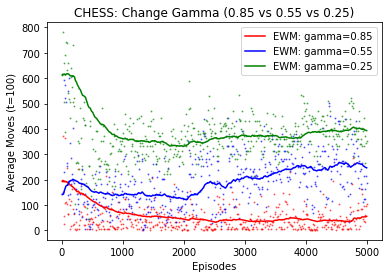

In [64]:
xlabel = "Episodes"
ylabel = "Average Moves (t=100)"
title = "CHESS: Change Gamma (0.85 vs 0.55 vs 0.25)"

Data = N_moves_save_85
data_85, ema_85 = EWM(Data,Episode,xlabel,ylabel,title)
Data = N_moves_save_55
data_55, ema_55 = EWM(Data,Episode,xlabel,ylabel,title)
Data = N_moves_save_25
data_25, ema_25 = EWM(Data,Episode,xlabel,ylabel,title)

plt.scatter(Episode,list(data_85[0]), s=1, color='r', alpha=0.5)
plt.scatter(Episode,list(data_55[0]), s=1, color='b', alpha=0.5)
plt.scatter(Episode,list(data_25[0]), s=1, color='g', alpha=0.5)

plt.plot(Episode,list(ema_85[0]), label="EWM: gamma=0.85", color = 'r')
plt.plot(Episode,list(ema_55[0]), label="EWM: gamma=0.55", color = 'b')
plt.plot(Episode,list(ema_25[0]), label="EWM: gamma=0.25", color = 'g')

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()
plt.show()